# Classification Example

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

Now that we’ve got an idea about how we might judge the performance quality of classification problem let’s look at the mechanics of implementing a classification model using some visualization and scikit. We’ve already seen it in action on a regression problem where we were predicting the MPG for the mtcars data frame. We’ll be sticking with the Pima Indians dataset. In case you have forgotten, here are the variables in the data frame:

    pregnant - Number of times pregnant
    glucose  - Plasma glucose concentration (glucose tolerance test)
    pressure - Diastolic blood pressure (mm Hg)
    triceps  - Triceps skin fold thickness (mm)
    insulin  - 2-Hour serum insulin (mu U/ml)
    mass       - Body mass index (weight in kg/(height in m)\^2)
    pedigree - Diabetes pedigree function
    age      - Age (years)
    diabetes - Class variable (test for diabetes)

So let’s look at some exploratory plots to see if there is anything interesting happening. We’ll use the Data Explorer package to help us with this although both R and Python have various packages to help with this kind of thing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/pima.csv"
pm = pd.read_csv(url, sep=',')

# What kind of data types do we have ?
print((pm.dtypes))

# What are the dimensions of the data ?
print("\nDimensions are: %s \n" % str(pm.shape))

# We can sort the data frame by one or more variables
pm.sort_values(['age','glucose']).head()

# How many people have diabetes ? 
print("Value counts of the diabetes columns:\n")
pm.groupby('diabetes').size()

pregnant      int64
glucose       int64
pressure      int64
triceps       int64
insulin       int64
mass        float64
pedigree    float64
age           int64
diabetes     object
dtype: object

Dimensions are: (768, 9) 

Value counts of the diabetes columns:



diabetes
neg    500
pos    268
dtype: int64

## Categorical or Continuous Variables

One thing i like to do is determine the number of unique values assumed by each column to get some idea about which columns are categories and which are continuous quantities. This is very helpful since we might want to:

  - summarize continuous quantities in terms of categories
  - look at correlations between continuous quantities
  - look at count data or tables for categories
  - bin continuous data into categories

These are just some of the options. Which of the following below represent categories ? 

In [2]:
pm.nunique()

pregnant     17
glucose     136
pressure     47
triceps      51
insulin     186
mass        248
pedigree    517
age          52
diabetes      2
dtype: int64

## Visualizations

It's easy to visualize data using the builin plot methods available to pandas data frames. We'll also use the seaborn graphics add on which "beautifies" the generic matplotlib graphics. 

array([[<AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'pressure'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

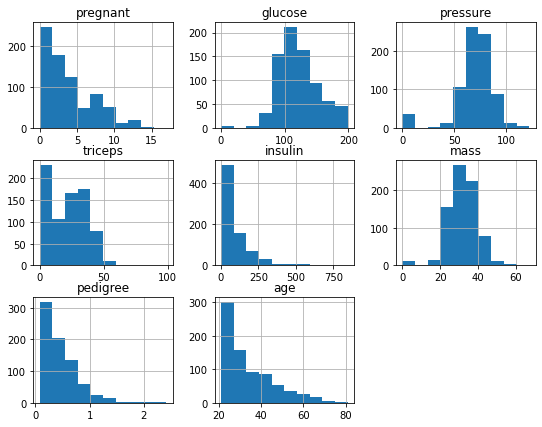

In [3]:
# Establish the figure size
pm.hist(figsize=(9,7))

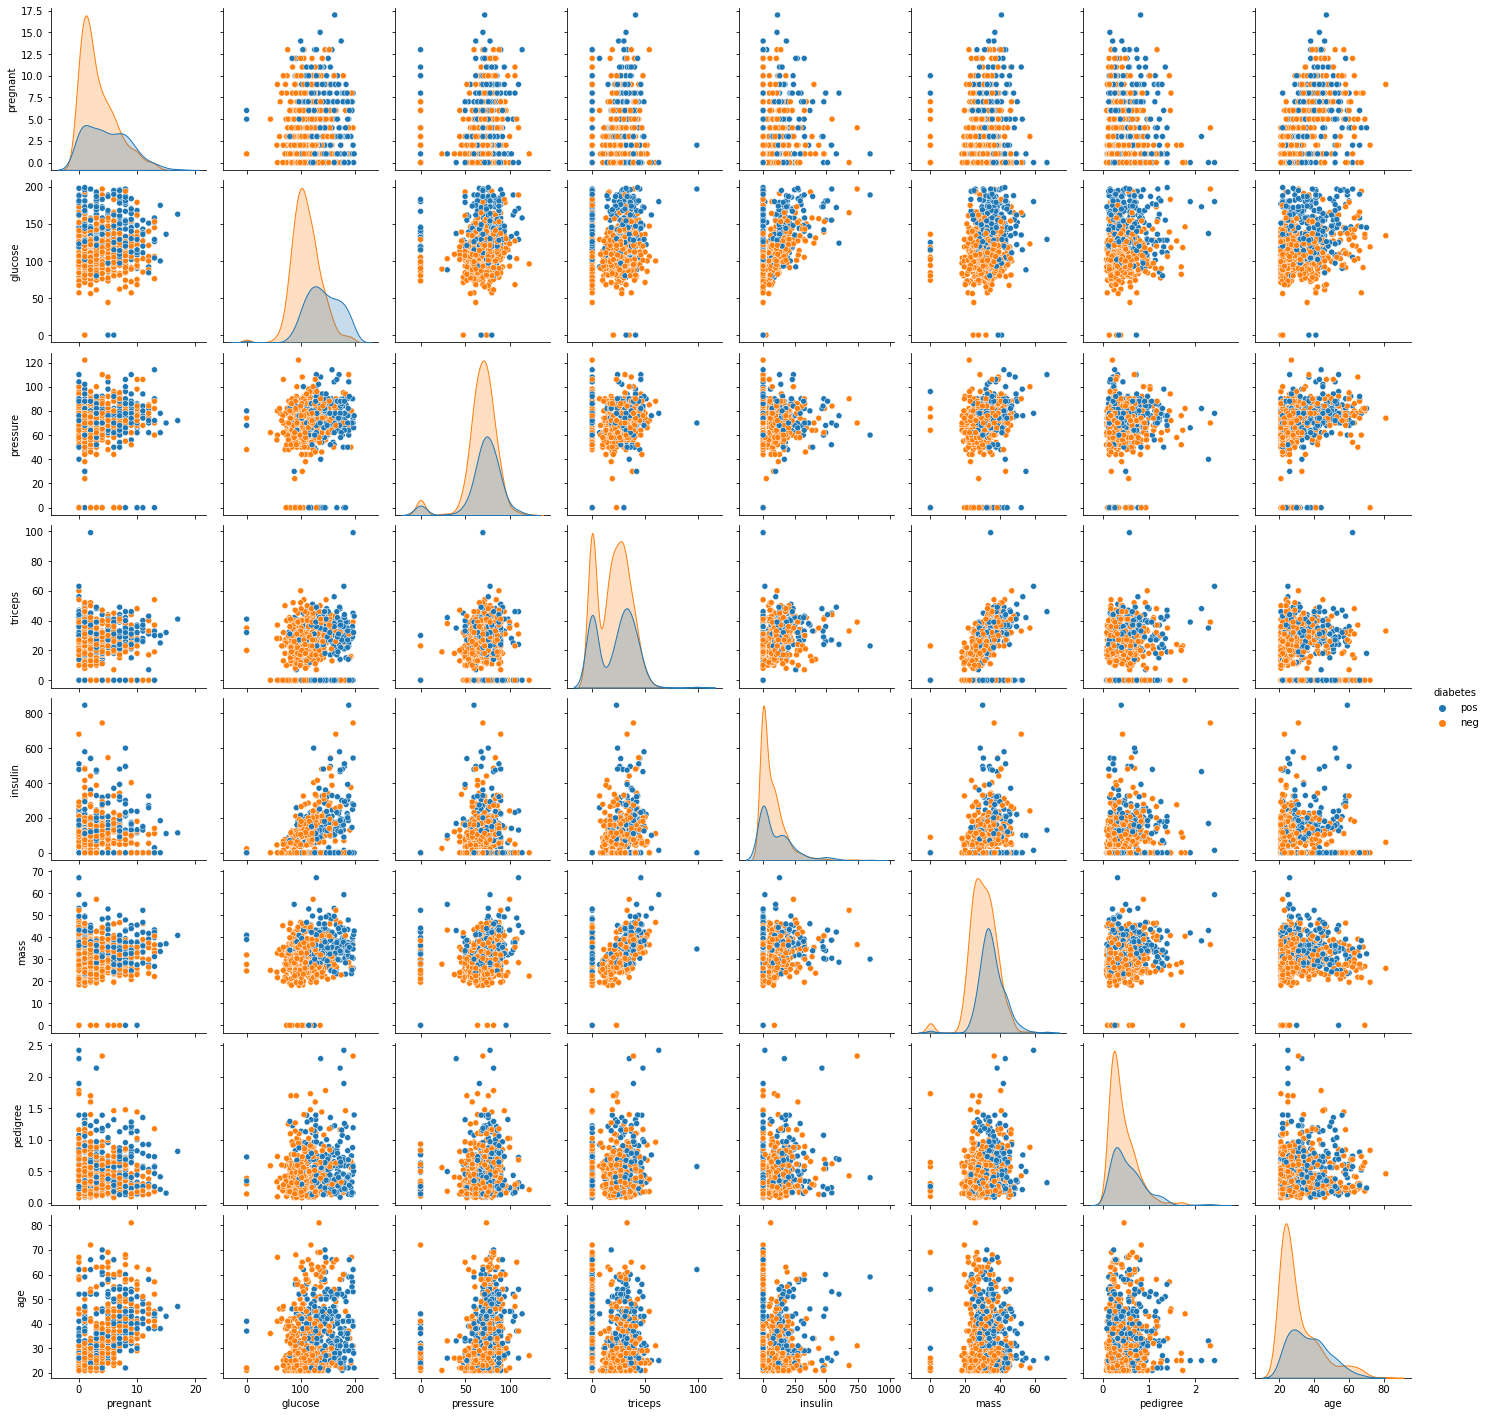

In [4]:
import seaborn as sns# Create the default pairplot
sns.pairplot(pm,hue="diabetes")

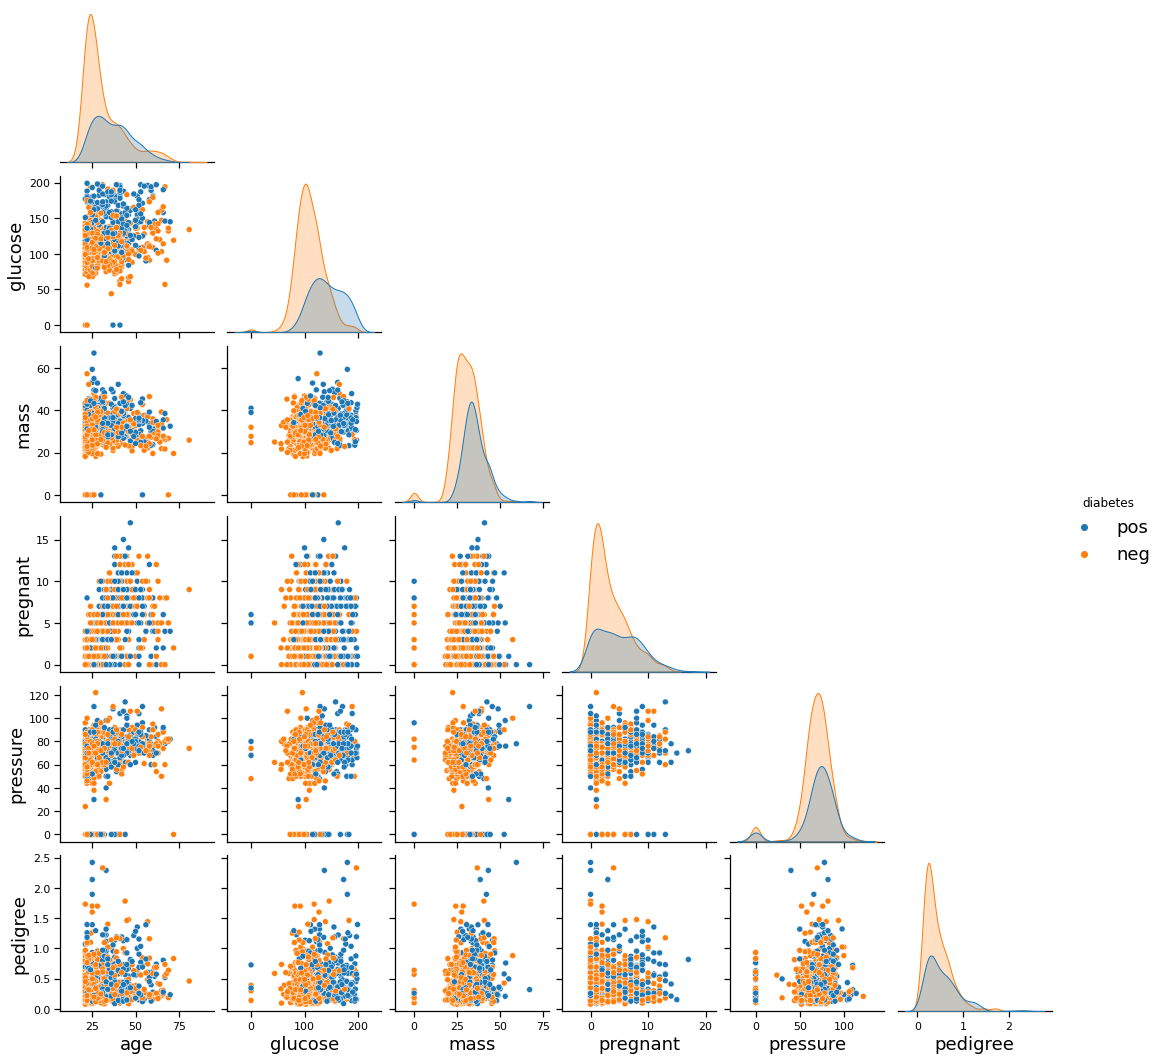

In [5]:
# Do a more targeted pair plot of variables believed to be interesting
sns.set_context("notebook", rc={"axes.labelsize":18,'legend.fontsize':18})

# Do a more targetted plot
cols = ['age','glucose','mass','pregnant','pressure','pedigree','diabetes']
sns.pairplot(pm[cols],hue="diabetes",corner=True)

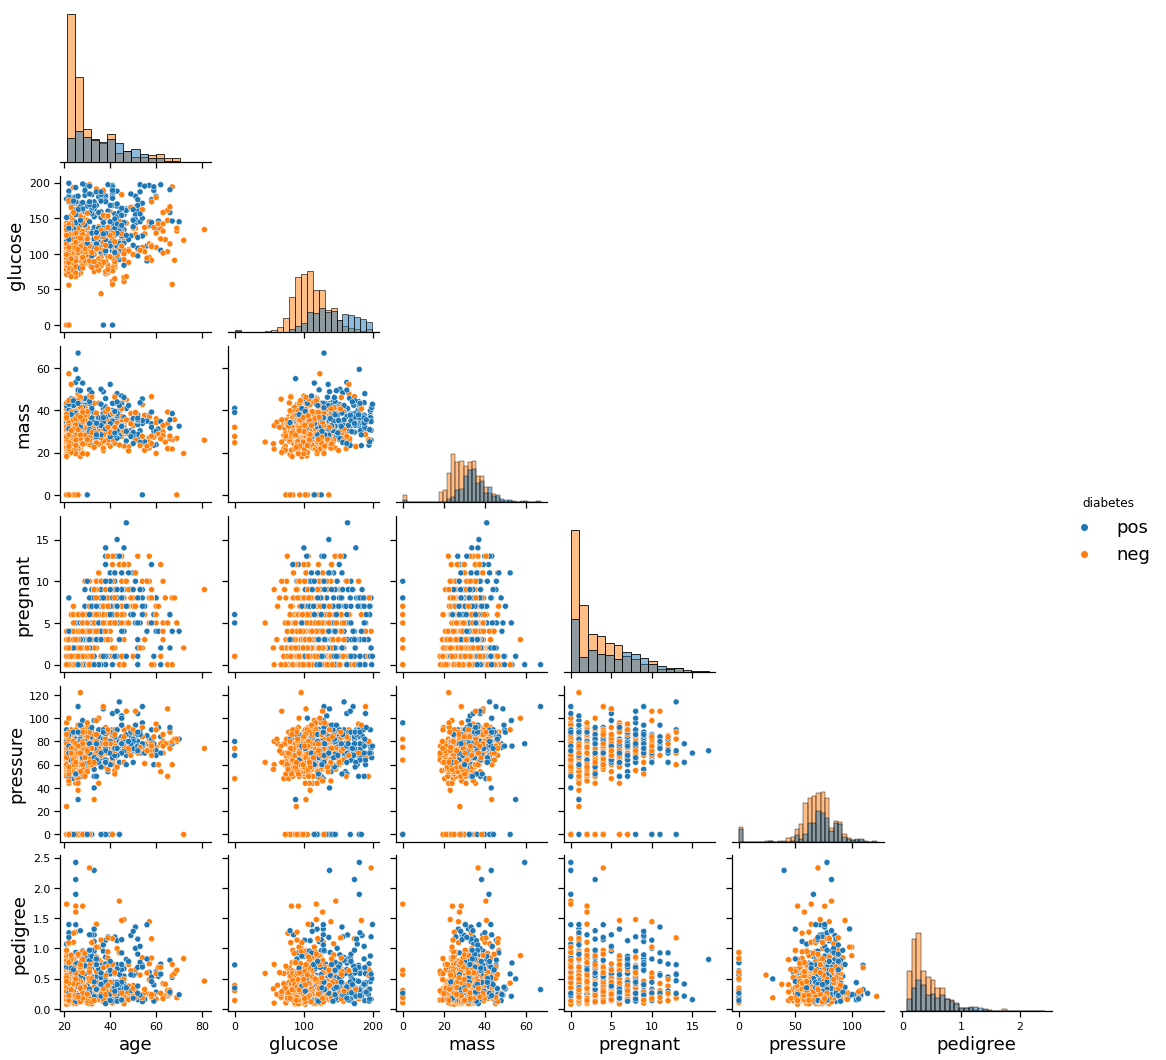

In [6]:
sns.pairplot(pm[cols],hue="diabetes",diag_kind="hist",corner=True)

neg         AxesSubplot(0.1,0.15;0.363636x0.75)
pos    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

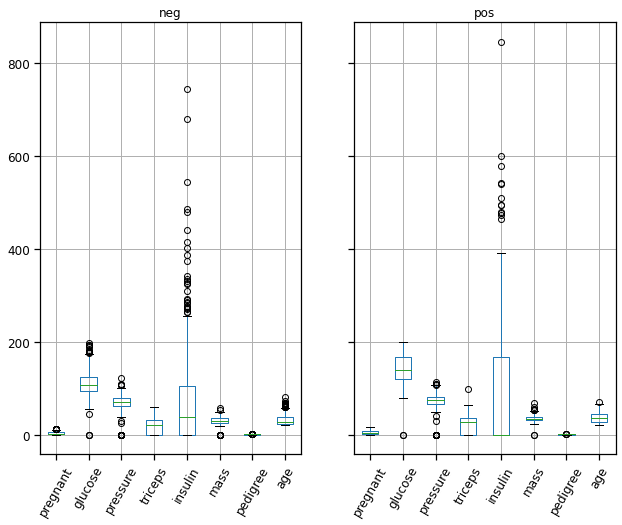

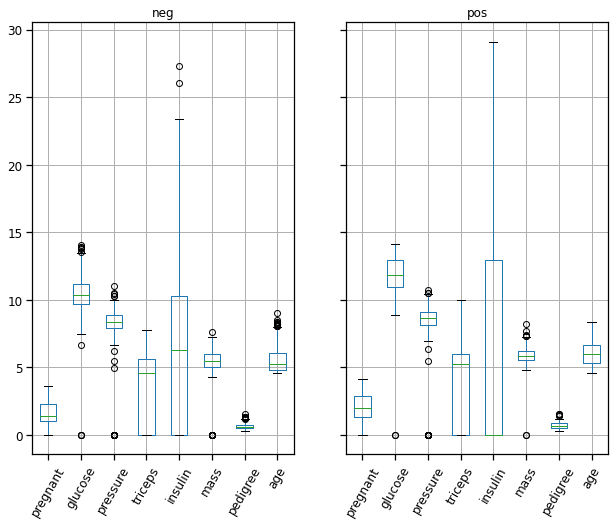

In [7]:
import numpy as np
grouped = pm.groupby('diabetes')
grouped.boxplot(rot=60, fontsize=12, figsize=(10,8))

# We could apply a transformation to make this a bit 
# more comprehensible

ndf = pm.apply(lambda x: np.sqrt(x) if np.issubdtype(x.dtype, np.number) else x)
grouped = ndf.groupby('diabetes')
grouped.boxplot(rot=60, fontsize=12, figsize=(10,8))

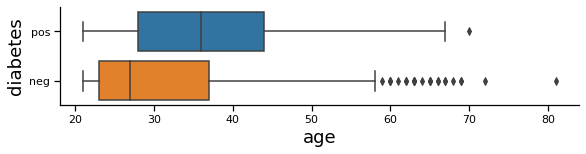

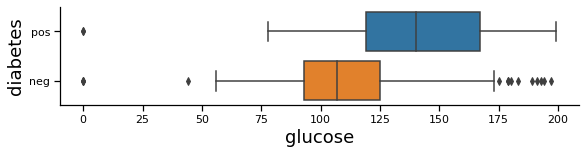

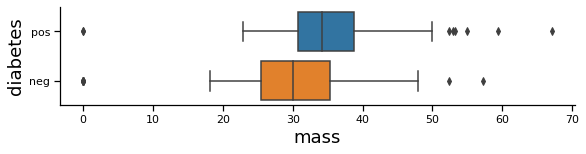

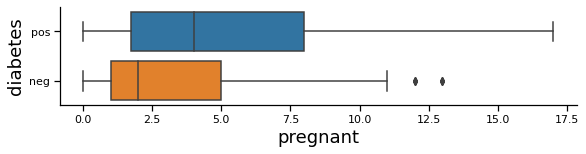

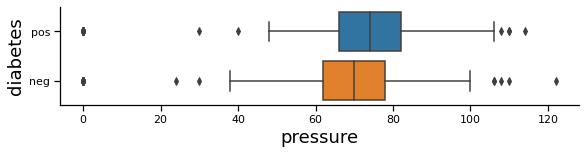

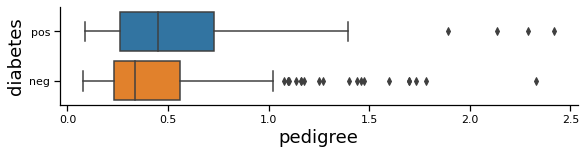

In [8]:
for columns in cols:
    if columns == "diabetes":
        pass
    else:
        g = sns.catplot(x=columns,
                        y="diabetes",
                        kind="box",
                        orient="h",
                        height=2.0,
                        aspect=4,
                        data=pm)

Text(0.5, 1.0, 'Glucose Levels')

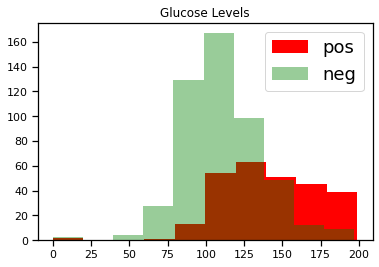

In [9]:
pm_pos = pm[pm.diabetes=="pos"]
pm_neg = pm[pm.diabetes=="neg"]
plt.hist("glucose",data=pm_pos,color="red",label="pos")
plt.hist("glucose",data=pm_neg,color="green",label="neg",alpha=0.4)
plt.legend()
plt.title("Glucose Levels")

## Correlations

This is one of the more interesting pieces of information because we can zone in on the specifics of what variables are correlated. Finding strongly correlated variables can be a clue as to which ones to include (or not) in any model we might build. While it is important to identify strong correlations and consider possible explanatory relationships, we might also wish to exclude strong creelates to a given variable to avoid the problem of multi-colinearity. We'll talk about this problem later but our evaluation of correlations begins with looking at a correlation matrix. 

In [10]:
pm.corr()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

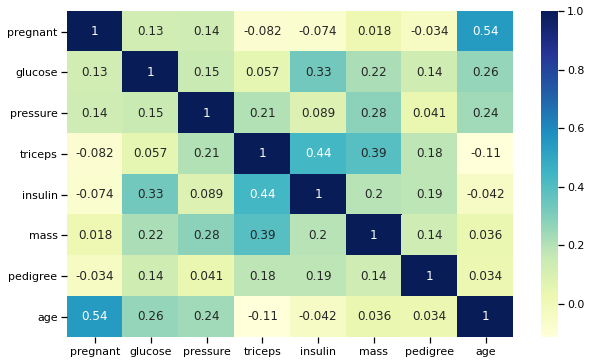

In [11]:
import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(10, 6)

sns.heatmap(pm.corr(), annot=True, cmap="YlGnBu")

## Class (Im)balance

One assumption that people frequently make is that the occurence of positive cases is equal to that of negative cases when that is rarely the case. Think about it. If you are investiagting an otherwise healthy population then occurence of a disease will generally be less frequent unless of course you are drilling down into a population where occurrence is higher. When training a model, it is important to "expose" your model to a sufficient number of positive cases so it can pick up on enough feature variance across classes (pos or neg) to generate an effective prediction both on the training and testing data. 

This is why performance measures like accuracy 
only go so far particularly when dealing with rare diseases. Consider a data set where only 5 percent of patients have a disease. You could avoid the expense of building a model and just say that everybody is negative for the disease and the accuracy would be 95% ! That's why we look at other performance measures such as sensitivity, precision, and so on. 

In the case of the pima indianas, we have the following distribution of diabetics to non diabetics in the population.


In [12]:
# how many are in each category ? It this imbalanced ?
pm.diabetes.value_counts()

neg    500
pos    268
Name: diabetes, dtype: int64

So if we look at the percentage of negatives to the overall population we have roughly 65% of the population showing up as positive. Without building a model we could just say that an observation chosen at random from the data will be negative and we would be right 65% of the time. Thus any model we build needs to beat an accuracy of 65% assuming we are optimzing for that performance metric. We'll deal with how to address this later on.

In [13]:
# An alternative method
from collections import Counter
freq = Counter(pm.diabetes)
print(freq)

Counter({'neg': 500, 'pos': 268})


## Using Pandas Profiler

So there is a way to "cheat" by using a tool called the pandas **Profile Report** function. This is an attempt at profiling a data set in a way that we kind of already have. In R, there is a package called **DataExplorer** which does similar things. While it's not "cheating" to use these tools, it is better if you can create your own visualizations and plots to get an idea about your data. But in the interest of showing you something cool, here it is. You will get what is essentially a multi page report that you can scroll through. Or, you can click the various tabs in the upper right of the first page to directly access, for example, the **Correlation** section. Again, none of this is anything thart you could NOT do for yourself so consider it as a supporting function. 

In [14]:
from pandas_profiling import ProfileReport
file = ProfileReport(pm)

# the following writes out an HTML file you can load in a browser
file.to_file(output_file="output.html")

<img src="pics/pandas_profiler.png" width ="600" height=600>

# What Next ? 

At this point we don't really see super strong correlations so we'll just build our model using all available variabes. However, we will see that we can in fact do some interesting things to help figure out which variables might be more worthy of examination. Let’s pick a technique to model the data with the ultimate goal of being able to predict whether someone has diabetes or not. We’ve already seen Logistic Regression in action so let's use Support Vector Machine to see what we can see. We’ll take a kitchen sink approach where we predict the diabetes variable (“yes” or “no”) based on the rest of the information in the data frame.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

X = pm.drop('diabetes',axis=1)
y = pm.diabetes

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2)

print("Dimensions of X_train:", X_train.shape)
print("Dimensions of X_test", X_test.shape)

Dimensions of X_train: (614, 8)
Dimensions of X_test (154, 8)


## Support Vector Machine

Let's use a support vector machine to do some predictionsn to see if it does any better

Text(0.5, 1.0, 'ROC Curve for SVM with RBF Kernel')

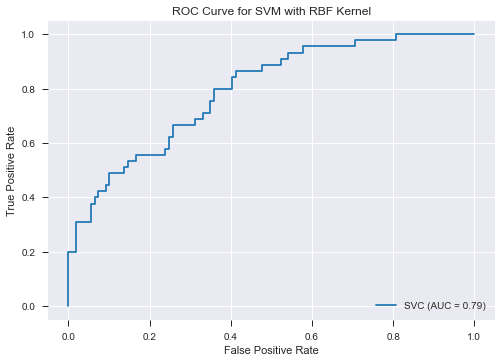

In [16]:
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf',probability=True).fit(X_train, y_train)
y_test_preds = rbf_svc.predict(X_test)
metrics.plot_roc_curve(rbf_svc, X_test, y_test) 
plt.title("ROC Curve for SVM with RBF Kernel")

In [17]:
class_report = metrics.classification_report(y_test, rbf_svc.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

         neg       0.80      0.90      0.84       109
         pos       0.65      0.44      0.53        45

    accuracy                           0.77       154
   macro avg       0.72      0.67      0.69       154
weighted avg       0.75      0.77      0.75       154



## Getting More Information

One important thing to note is that any model being returned from a **scikit-learn** method has information that might be helpful in a downstream analysis. These methods end in an underscore character. Depending on the function being used, there will be specific methods presented.

<img src="pics/underbar.png" width ="600" height=600>

In [18]:
# Get the possible values of the target variable
rbf_svc.classes_

array(['neg', 'pos'], dtype=object)

## Scaling Down

So up until now we have ignored the fact that the various columns / features exist on different scales. For example, here are the variables:

        pregnant Number of times pregnant                              
        glucose  Plasma glucose concentration (glucose tolerance test) 
       pressure  Diastolic blood pressure (mm Hg)                      
        triceps  Triceps skin fold thickness (mm)                      
        insulin  2-Hour serum insulin (mu U/ml)                        
           mass  Body mass index (weight in kg/(height in m)\^2)       
       pedigree  Diabetes pedigree function                            
            age  Age (years)                                           
       diabetes  Class variable (test for diabetes)  
 
So it's not hard to understand that the pressure variable is on a different scale than insulin, mass, or age. Same with the number of times someone has been pregnant. We might want to deal with this by using a scaling method which adjusts the data in a way that reduces the influence of, for example, the insulin variable. We saw in the boxplot that the range was large in comparison to the range of other variables which made the resulting plot somewhat difficult to view. There are a number of ways to scale data but here we'll use a basic method.

neg         AxesSubplot(0.1,0.15;0.363636x0.75)
pos    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

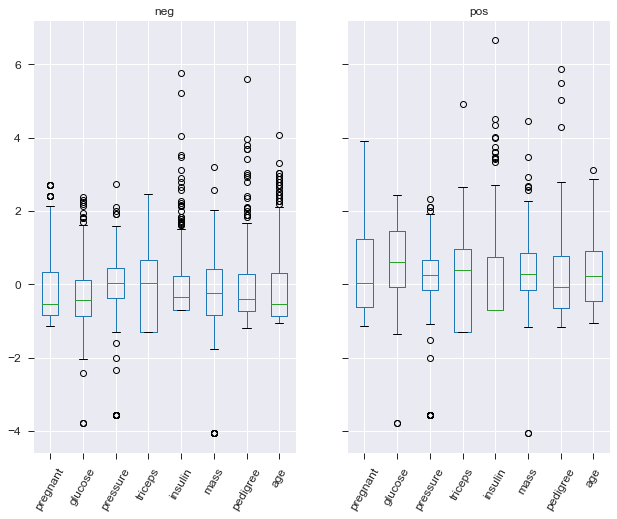

In [19]:
from sklearn import preprocessing

# Scale the predictor data
X_scaled = preprocessing.scale(X)

# Make a new data frame out of the resulting scaled array
# This isn't necessary but makes plotting a bit easier
myscale = pd.DataFrame(X_scaled,columns=X.columns)
myscale['diabetes'] = pm.diabetes

# Group the plot by the diabetes levels - neg or pos
grouped = myscale.groupby('diabetes')
grouped.boxplot(rot=60, fontsize=12, figsize=(10,8))

              precision    recall  f1-score   support

         neg       0.77      0.89      0.83        96
         pos       0.75      0.57      0.65        58

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



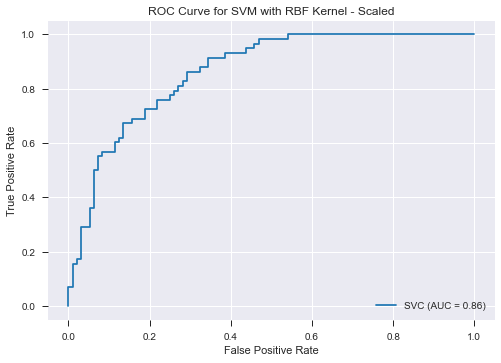

In [20]:
# Let's check out a SVM on some scaled data
from sklearn import preprocessing

# Scale the predictor data
X_scaled = preprocessing.scale(X)

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

# Does scaling make a difference ? 
rbf_svc = svm.SVC(kernel='rbf',probability=True)
rbf_svc.fit(X_train, y_train)
y_test_preds = rbf_svc.predict(X_test)

# Plot the ROC Curve
metrics.plot_roc_curve(rbf_svc, X_test, y_test) 
plt.title("ROC Curve for SVM with RBF Kernel - Scaled")

# Print Classification Report
class_report = metrics.classification_report(y_test, rbf_svc.predict(X_test))
print(class_report)

Let's look at this using cross fold validation

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score

# Let's split the data into 8 folds
kfold = KFold(n_splits=8, random_state=7, shuffle=True)

# Set up the Classifier
rbf_svc = svm.SVC(kernel='rbf',probability=True)

# Next, let's see the average AUC across all the folds
results = cross_val_score(rbf_svc, 
                          X_train, 
                          y_train, 
                          cv=kfold, 
                          scoring="roc_auc")

# Check the mean AUC value
print("Mean AUC: ",results.mean().round(2))

# Okay, here we change the pos and neg labels to 1 and 0 respectively
y_train_delabeled = y_train.map({'pos': 1, 'neg': 0}).astype(int)

# Fit the model
rbf_svc.fit(X_train,y_train_delabeled)

# How does the model work on a test prediction ? 
class_report = metrics.classification_report(y_test.map({'pos':1,'neg':0}), 
                                             rbf_svc.predict(X_test))
print(class_report)

Mean AUC:  0.82
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        96
           1       0.75      0.57      0.65        58

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



<AxesSubplot:>

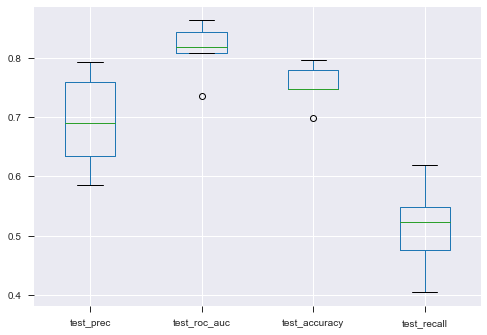

In [22]:
# As a preview - Cross Validate is similar to cross_val_score but allows 
# for more than one scoring metric

# All of these metrics are known to scikit
scoring = {'prec': 'precision','roc_auc': 'roc_auc',
           'accuracy':'accuracy','recall':'recall'}

cv_results = cross_validate(rbf_svc.fit(X_train,y_train_delabeled), 
                            X_train, 
                            y_train_delabeled, 
                            cv=5, 
                            scoring=scoring)

cvdf = pd.DataFrame.from_dict(cv_results)
cvdf = cvdf.drop(['fit_time','score_time'],axis=1)
cvdf.boxplot()

## Variable Importance

To inroduce the idea of feature importance, think about what columns / features are the most influential when building a model. Could it really be necessary to include all variables when building model or just maybe some of them ? Ideally, we would use the smallest number of columns necessary to build a highly accurate (or sensitive) model because it winds up being easier to defend in discussions. As an example, we could use the coefficients (or magnitude thereof) from a Logistic Regression as some type of indication of importance. 

Feature: 0, Score: 0.34131
Feature: 1, Score: 1.09451
Feature: 2, Score: -0.19881
Feature: 3, Score: 0.03543
Feature: 4, Score: -0.17289
Feature: 5, Score: 0.76342
Feature: 6, Score: 0.32351
Feature: 7, Score: 0.17627


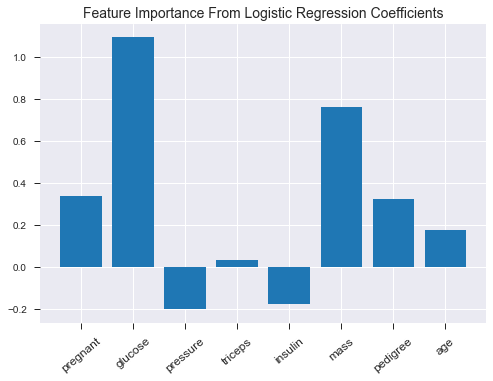

In [23]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Setup the LR model and fit it
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# Extract the coefficients
importance = logit_model.coef_[0]

# Let's check them out
for i in range(0,len(importance)):
    print('Feature: %0d, Score: %.5f' % (i,importance[i]))
    
# We'll plot them
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance From Logistic Regression Coefficients",fontsize=14)
plt.xticks(range(0,len(importance)),X.columns.tolist(),rotation=40)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Sort By Magnitude

While we don't have a lot of features here, it might be useful to sort these in order of magnitude to make it obvious which features are the most influential (or apparently so).  This approach could be used in situations where there are many more features in which case the process of indetifying the more influential features might be difficult if they are viewed in an unsorted fashion.

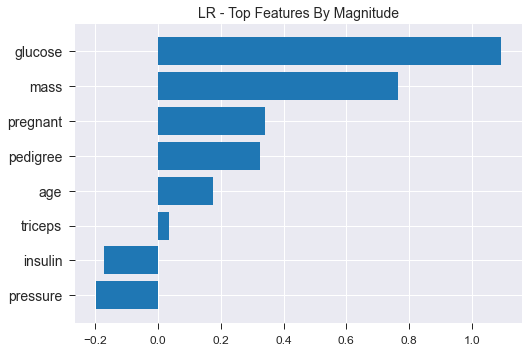

In [24]:
# The previous graph was ugly, let's beautify it
sorted_idx = importance.argsort()
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

glucose    1.09451
mass       0.76342
pregnant   0.34131
pedigree   0.32351
pressure   0.19881
age        0.17627
insulin    0.17289
triceps    0.03543


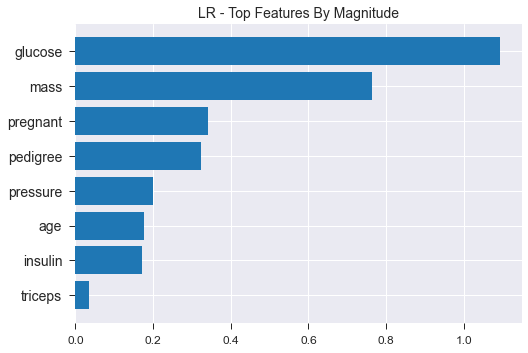

In [25]:
# We can still improve on the above graph
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

for i in hold:
    print('%-10s %.5f' % (X.columns[i],absvals[i]))

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

### Compared to Decision Tree

So one thing that is important to do is to compare the variable importance as determined by other methods. Decision trees return this information explicitly as part of their work. All that is necessary is to fit on the data and see what features the method thinks are significant. There are ususally differences between methods and some experimentation will be necessary to see what features might be commonly reported as being important across multiple methods.

In [26]:
## Variable Importance From Decision Trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

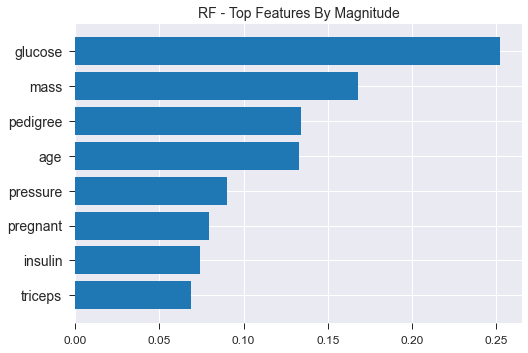

In [27]:
# Get the importance features
rf.feature_importances_

# Sort them
sorted_idx = rf.feature_importances_.argsort()

# Plot them
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("RF - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

So now that we've found some interesting features, let's see if building a model using them will yield a model with comparable performance. 

In [28]:
rf = RandomForestClassifier()

# Get the columns associated with the highly rated features
X_train_import = X_train[:,[1,5,6,7,2]]
X_test_import  = X_test[:,[1,5,6,7,2]]

# Fit the model using this new data
rf.fit(X_train_import, y_train)

# Do the predicton
y_test_preds = rf.predict(X_test_import)

class_report = metrics.classification_report(y_test, 
                                             rf.predict(X_test_import))

print(class_report)
fpr, tpr, thresholds = metrics.roc_curve(y_test.map({'pos':1,'neg':0}), 
                                         pd.Series(y_test_preds).map({'pos':1,'neg':0}))
print("AUC: ",round(metrics.auc(fpr, tpr),2))


              precision    recall  f1-score   support

         neg       0.84      0.83      0.84        96
         pos       0.73      0.74      0.74        58

    accuracy                           0.80       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.80      0.80       154

AUC:  0.79


## Target Variable Format


If you notice, the format of the Pima data frame has indicated that the diabetes variable is a "pos" or "neg" which, intuitively, corresponds to that observation being "positive" or "negative" for diabetes. Thus far, this hasn't presented such a problem although I have had to use the **map** function to convert these values to 0 ("negative") and 1 ("positive") because that's what a certain function might expect as opposed to the actual label. 

Some functions will allow you to include a **pos_label** argument so you don't have to do the conversion although it's not uniform across all functions at least that I have found. One of the appropriate strategies to employ is to handle this up front in your data before scaling it or creating training and testing derivatives. 

Let's look at the original value of the X and y data that we used to generate the scaled data.


In [29]:
print(X.head(),"\n")

print("y:\n")
print(y.head())

   pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age
0         6      148        72       35        0  33.6     0.627   50
1         1       85        66       29        0  26.6     0.351   31
2         8      183        64        0        0  23.3     0.672   32
3         1       89        66       23       94  28.1     0.167   21
4         0      137        40       35      168  43.1     2.288   33 

y:

0    pos
1    neg
2    pos
3    neg
4    pos
Name: diabetes, dtype: object


Python rightly recognizes this as an object but we can turn it into a 0 and 1 to keep from having to do conversions downstream. There are a couple of ways to do this such as the way I've been doing which involves the **map** method. Or we could use the LabelBinarizer method from the sklearn **preprocessing** module. 

In [30]:
y.map({'pos':1,'neg':0})

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [31]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1)
lb.fit(y)

# Check out what the fit looks like
lb.classes_

# Now do the actual transform (well, here only the first 10 rows)
lb.transform(y)[0:10,]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [32]:
type(lb.transform(y))

numpy.ndarray

They both produce arrays. If we do this up front then we dont have to worry about this again. This is not the same as doing something called "one hot encoding" which is a type of transformation we apply to predictor variables that are categories with a discrete number of **levels**. In R, we call these **factors** though in Python they might be known as **objects**. We'll talk more about one hot encoding in a later session. 

In [33]:
y = lb.transform(y)

In [34]:
from sklearn import preprocessing
X = pm.drop('diabetes',axis=1)
y = pm.diabetes

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2)


# Scale the predictor data
X_scaled = preprocessing.scale(X)

lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1)
y = lb.fit(y).transform(y)

# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.2,
                                                    random_state=123)
y[1:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

So we can proceed as before. Notice that we don't have do the mapping to substitute in 1 and 0 for "pos" and "neg", respectively, as we did before. 

AUC:  0.77
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        96
           1       0.74      0.69      0.71        58

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.79      0.79      0.79       154



Text(0.5, 1.0, 'ROC Curve for RF - Scaled')

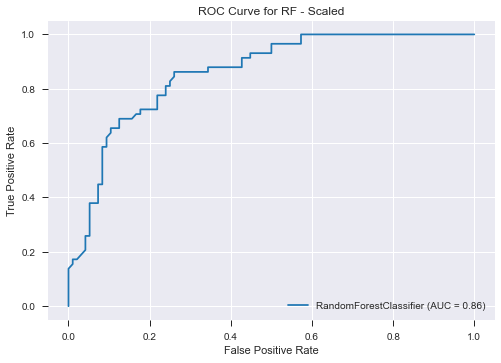

In [35]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train.ravel())

y_test_preds = rf.predict(X_test)

class_report = metrics.classification_report(y_test, 
                                             y_test_preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_preds)
print("AUC: ",round(metrics.auc(fpr, tpr),2))

print(class_report)

metrics.plot_roc_curve(rf, X_test, y_test) 
plt.title("ROC Curve for RF - Scaled")


## Class Imbalance Reprise

So we notice that we might have a class imbalance which, even though it exists, hasn't prevented us from generating some pretty decent models thus far. 


Counter({'neg': 500, 'pos': 268})


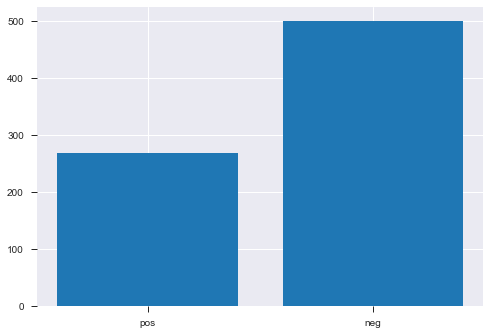

In [36]:
from numpy import where
# how many are in each category ? It this imbalanced ?
pm.diabetes.value_counts()

counter = Counter(pm.diabetes)
print(counter)

plt.bar(counter.keys(), counter.values())
plt.show()

We can deal with this using a number of approaches such as:

    - Use stratified sampling when doing Cross Fold validation
    - Resample the minority class to get more minority cases  (upsample)
    - Resample the majority class to get fewer majority cases (downsample)
    - Use SMOTE Synthetic Minority Oversampling Technique
 
In any of these approaches we have to decide to what extent we wish to balance out the classes. Do we want a strict 50/50 balance ? We have the ability to dicate the proportions and it's possible that some experimenation might be useful. We'll look at the oversampling and SMOTE approach for now. Let's look at a very basic data frame to get a feel for how the upsampling would work. Our goal is to get more representation for a minority class. Here we have a 7 row dataframe with 4 "reds" and 3 "blues". Let's upsample the blues to match the "reds". 

In [37]:
colors = pd.DataFrame([[1,"red"],
                       [2,"red"],
                       [1,"blue"],
                       [3,"red"],
                       [4,"red"],
                       [9,"blue"],
                       [4,"blue"]],columns=['f1','color'])

colors.color.value_counts()

red     4
blue    3
Name: color, dtype: int64

In [38]:
from sklearn.utils import resample 
red  = colors[colors.color == "red"]
blue = colors[colors.color == "blue"]

blue_upsampled = resample(blue,
                          replace=True, # sample with replacement
                          n_samples=len(red), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_blue = pd.concat([red, blue_upsampled])

# Let's see what we get for our trouble
new_blue

,f1,color
0,1,red
1,2,red
3,3,red
4,4,red
2,1,blue
2,1,blue
2,1,blue
2,1,blue


## Resampling the Minority Class

In the case of the Pima data we will resample the minority class which are the positive cases. As with the colors dataframe we can use the **resample** function to help us get more representation from the minority class. The steps involved are as follows:

 - Concatenate the existing X_train and y_train data frames
 - Separate the majority classes from the minority classes (neg vs pos)
 - Use the resample function to match the number of majority cases (neg)
 - Create a combined data frame from the upsampled minority class and the majority
 - Build a model using this 

In [39]:
# concatenate our training data back together
X = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1) 

X.columns = pm.columns

# separate minority and majority classes
non_diabetic = X[X.diabetes == 0]    # majority
diabetic     = X[X.diabetes == 1]    # minority

# upsample minority
diabetes_upsampled = resample(diabetic,
                              replace=True, # sample with replacement
                              n_samples=len(non_diabetic), # match number in majority class
                              random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([non_diabetic, diabetes_upsampled])

# check new class counts
upsampled.diabetes.value_counts()


0    404
1    404
Name: diabetes, dtype: int64

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        96
           1       0.68      0.71      0.69        58

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Text(0.5, 1.0, 'ROC Curve for RF - Scaled')

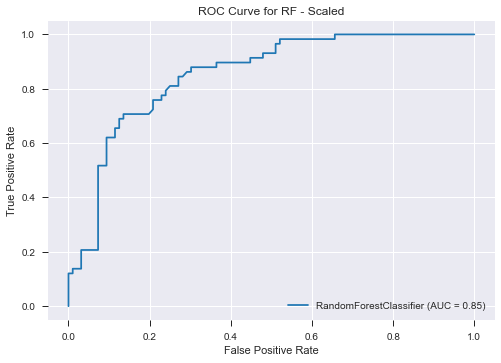

In [40]:
# Build a model using the upsampled data
y_up_train = upsampled.diabetes
X_up_train = upsampled.drop('diabetes', axis=1)

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_up_train, y_up_train)

# Let's try this model on the test data
y_test_preds = rf.predict(X_test)

# Get some metric reports
class_report = metrics.classification_report(y_test, 
                                             y_test_preds)

print(class_report)

# Plot the ROC Curve
metrics.plot_roc_curve(rf, X_test, y_test) 
plt.title("ROC Curve for RF - Scaled")


Has the sensitivity been improved at all ?

## SMOTE

SMOTE stands for "Synthetic Minority Over-sampling Technique" which, like the resample
function, seeks to address imblances in data. One of the benefits of this approach is that rather than just doing a bootstrap sample of existing data, SMOTE will synthesize "new" records which represent the minority class based on a "nearest neighbors" approach. 

So as SMOTE does its work, it identifies the "K nearest" minority class neighbors where K is specified by you. So then a new observation is produced based on this information.

Let's look at a more basic example of SMOTE so you can better see what is happening. Let's look at a basic example using our **colors** data frame from above. This will allow us to see how SMOTE behaves differently thsan the **resample** function.

In [41]:
colors

,f1,color
0,1,red
1,2,red
2,1,blue
3,3,red
4,4,red
5,9,blue
6,4,blue


In [42]:
# Bring in the imbalance library
from imblearn.over_sampling import SMOTE

# Fire up a SMOTE object
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=100)

# Separate the Pre Smote data back into X, y
y_col = colors.color
X_col = colors.drop('color', axis=1)

# resample the data to equalize neg to pos cases using KNN
X_res, y_res = sm.fit_resample(X_col, y_col)

# Combine the data and see how it differs from the original data
smoted_colors = pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

# Note the appearance of a new record which did not exist previously
# Row 7 has [3, blue] which was synthesized based on the other "blue" rows

smoted_colors

,f1,color
0,1,red
1,2,red
2,1,blue
3,3,red
4,4,red
5,9,blue
6,4,blue
7,3,blue


Original dataset shape Counter({0: 404, 1: 210})


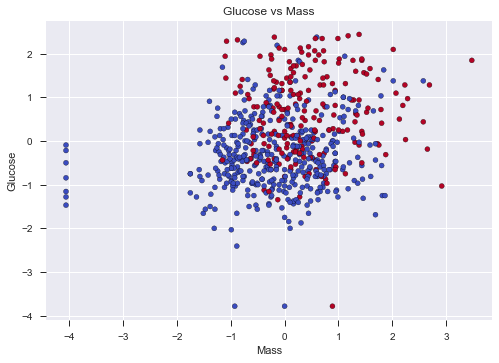

In [43]:
# Let's apply this to our Pima Indians data
# Also see 
# https://github.com/kiteco/kite-python-blog-post-code/blob/master/smote/create_smoted_df.py

# concatenate our training data back together
X_pre_smote = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1) 
X_pre_smote.columns = pm.columns
print('Original dataset shape %s' % Counter(y_train.ravel()))

# Plot the Glucose vs Mass
plt.title("Glucose vs Mass")
plt.xlabel('Mass')
plt.ylabel('Glucose')
plt.scatter(X_pre_smote.mass, X_pre_smote.glucose, marker='o', 
                   c=X_pre_smote.diabetes,
                   s=25, edgecolor='k', cmap=plt.cm.coolwarm)

# Most of the cases are negative (in blue)

Smoted dataset shape Counter({0: 404, 1: 404})


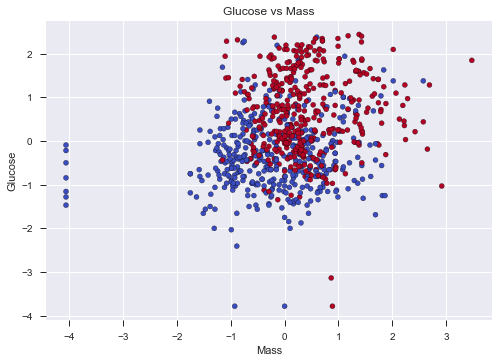

In [44]:
# Bring in the imbalance library
from imblearn.over_sampling import SMOTE

# Fire up a SMOTE object
sm = SMOTE(sampling_strategy='auto', k_neighbors=6, random_state=100)

# Separate the Pre Smote data back into X, y
y_smoted_train = X_pre_smote.diabetes
X_smoted_train = X_pre_smote.drop('diabetes', axis=1)

# resample the data to equalize neg to pos cases using KNN
X_res, y_res = sm.fit_resample(X_smoted_train, y_smoted_train)
print('Smoted dataset shape %s' % Counter(y_res))

# Now plot the resulting "smoted" data
plt.title("Glucose vs Mass")
plt.xlabel('Mass')
plt.ylabel('Glucose')
hold = plt.scatter(X_res.mass, X_res.glucose, marker='o', c=y_res,
            s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        96
           1       0.69      0.76      0.72        58

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



Text(0.5, 1.0, 'ROC Curve for RF - Scaled')

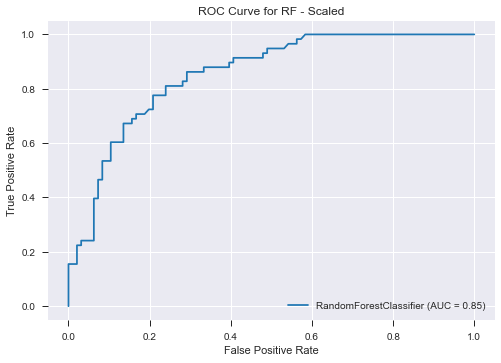

In [45]:
# Now let's see the performance on the test data
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_res, y_res)

# make a prediction on our test data
y_test_preds = rf.predict(X_test)

# Do some reporting
class_report = metrics.classification_report(y_test, 
                                             y_test_preds)

print(class_report)
# Plot the ROC Curve
metrics.plot_roc_curve(rf, X_test, y_test) 
plt.title("ROC Curve for RF - Scaled")

What does the sensitivity look like when compared to the upsampling approach ? 

## Stratified Sampling

So what about when we do cross fold validation which can involve splitting the data up into, for example, 10 different folds ? If our original data has an imbalance in the number of "pos" and "neg" cases to begin with, that difference might get reflected when the folds are made. Of course, this is part of the reason that we use 10 folds in the first place such that such differences might be mitigated. But if we use fewer folds then the difference might impact how the model is training. To this end we can still use K-Fold valdiation but use a different function called StratifiedKFold validation that can make certain that when we create folds that the proportion of a specified group is reflected as the folds get made. Check this out

In [46]:
# Reload Pima Indians
from numpy import unique

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/pima.csv"
pm = pd.read_csv(url, sep=',')

X = pm.drop('diabetes',axis=1)
y = pm.diabetes

# How many unique values of ?
classes = unique(y)
print(classes)

['neg' 'pos']


Let's see what the current distribution is of the neg to pos cases. Well, we already know what they are but let's look at this another way. 

In [47]:
# create a binary classification dataset
from numpy import unique

def counter(y):
    classes = unique(y)
    total = len(y)
    for c in classes:
	    n_examples = len(y[y==c])
	    percent = n_examples / total * 100
	    print('> Class=%s : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

counter(y)

> Class=neg : 500/768 (65.1%)
> Class=pos : 268/768 (34.9%)


So if we create a KFold object and use 3 for the number of folds. Let's repeat this exercise for each of the folds.

In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
for train_iy, test_iy in kfold.split(y):
#    print("Proportions in train:",counter(y[train_iy]))
    print("Proportions in test:",counter(y[test_iy]))

> Class=neg : 48/77 (62.3%)
> Class=pos : 29/77 (37.7%)
Proportions in test: None
> Class=neg : 51/77 (66.2%)
> Class=pos : 26/77 (33.8%)
Proportions in test: None
> Class=neg : 47/77 (61.0%)
> Class=pos : 30/77 (39.0%)
Proportions in test: None
> Class=neg : 53/77 (68.8%)
> Class=pos : 24/77 (31.2%)
Proportions in test: None
> Class=neg : 48/77 (62.3%)
> Class=pos : 29/77 (37.7%)
Proportions in test: None
> Class=neg : 53/77 (68.8%)
> Class=pos : 24/77 (31.2%)
Proportions in test: None
> Class=neg : 54/77 (70.1%)
> Class=pos : 23/77 (29.9%)
Proportions in test: None
> Class=neg : 50/77 (64.9%)
> Class=pos : 27/77 (35.1%)
Proportions in test: None
> Class=neg : 50/76 (65.8%)
> Class=pos : 26/76 (34.2%)
Proportions in test: None
> Class=neg : 46/76 (60.5%)
> Class=pos : 30/76 (39.5%)
Proportions in test: None


In [49]:
X = pm.drop('diabetes',axis=1)
y = pm.diabetes

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

sfold = StratifiedKFold(n_splits=10)
# enumerate the splits and summarize the distributions
#for train_ix, test_ix in kfold.split(X):
for train_ix, test_ix in sfold.split(X,y):    
	# select rows
    train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
	# summarize train and test composition
    train_0, train_1 = len(train_y[train_y=='neg']), len(train_y[train_y=='pos'])
    test_0, test_1 = len(test_y[test_y=='neg']), len(test_y[test_y=='pos'])
    perc1 = train_1/(train_0 + train_1)
    perc2 = test_1/(test_0 + test_1)
    print('>Train: %3.2f Test: %3.2f' % (perc1, perc2))

>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.35
>Train: 0.35 Test: 0.34
>Train: 0.35 Test: 0.34


In [51]:
'>Train: %3.2f Test: %3.2f' % (perc1, perc2)

'>Train: 0.35 Test: 0.34'

This can also be accomplished when a training and test fold pair are created. Note that in the first example we don't have the proportions.

In [52]:
# Next we create a training and test pair with 80 / 20 proportions
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2)

In [53]:
print("Proportions in train:", counter(y_train))
print("Proportions in test:", counter(y_test))


> Class=neg : 391/614 (63.7%)
> Class=pos : 223/614 (36.3%)
Proportions in train: None
> Class=neg : 109/154 (70.8%)
> Class=pos : 45/154 (29.2%)
Proportions in test: None


In [54]:
# Next we create a training and test pair with 80 / 20 proportions
# Note the use of the stratify argument
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2,stratify=y)

In [55]:
print("Proportions in train:", counter(y_train))
print("Proportions in test:", counter(y_test))

> Class=neg : 400/614 (65.1%)
> Class=pos : 214/614 (34.9%)
Proportions in train: None
> Class=neg : 100/154 (64.9%)
> Class=pos : 54/154 (35.1%)
Proportions in test: None
